In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-improper-intsing)

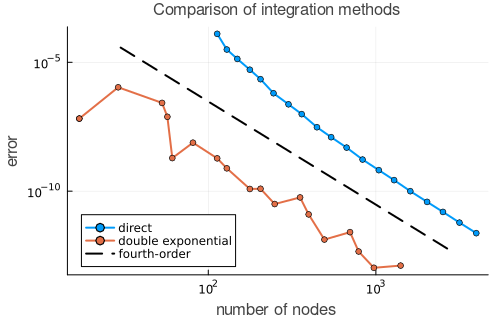

In [2]:
f(x) = 1 / (10 * sqrt(x))
tol = [1 / 10^d for d in 5:0.5:14]
err = zeros(length(tol), 2)
len = zeros(Int, length(tol), 2)
for (i, tol) in enumerate(tol)
    I1, x1 = FNC.intadapt(f, (tol/20)^2, 1, tol)
    I2, x2 = FNC.intsing(f, tol)
    @. err[i, :] = abs(0.2 - [I1, I2])
    @. len[i, :] = length([x1, x2])
end
plot(len, err, m=:o, label=["direct" "double exponential"])
n = [30, 3000]
plot!(n, 30n.^(-4);
    color=:black,  l=:dash,
    label="fourth-order",  legend=:bottomleft,
    xaxis=(:log10, "number of nodes"),
    yaxis=(:log10, "error"),
    title="Comparison of integration methods")

As in {numref}`Demo {number} <demo-improper-intinf>`, the double exponential method is more accurate than direct integration by a few orders of magnitude. Equivalently, the same accuracy can be reached with many fewer nodes.